In [1]:
##### Compare average slam match lengths to other major sport lengths with overtime
##### Import 2020 French, US and Aus opens and 2019 Wimbledon Match lengths

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
##### First analyze length of Games Main Sports and then tennis (various sources compiled for these):
NFL=190 #lengths in minutes
NHL=140
MLB=176
NBA=138
Soccer=114

# Overtime:
NHL_OT=(NHL-40)/3/20*12.25+15
NFL_OT=(NFL-12)/60*10+2
MLB_OT=29#+.2*29+.07*29 # 74% end in 10th inning, 93% by 11th inning...https://blogs.fangraphs.com/so-just-how-much-less-baseball-will-the-new-extra-innings-rule-give-us/
NBA_OT=((NBA-21)/48*5+2+1/6+6)#*1.19#Extra six minutes added for additional timeouts. 16% of playoffs go to 2OT. Add another .16/.84*.16=0.03 for 3OT
Soccer_OT=5+30+2+1#+20/51*9#20/51 World cup matches before 2010 went to shootout, which take about 9min (https://www.youtube.com/watch?v=p9QuQBrPTE8)

OT_avg=(NHL_OT+NFL_OT+MLB_OT+NBA_OT+Soccer_OT)/5
OT_avg_hrs=OT_avg/60

190
140
176
138
114
30.8875


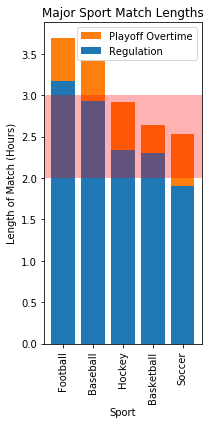

In [4]:
##### Plot average match length of 5 major sports with their overtimes
plt.figure(figsize=(3,6))
regulation=np.array([NFL,MLB,NHL,NBA,Soccer])
OT=np.array([NFL_OT,MLB_OT,NHL_OT,NBA_OT,Soccer_OT])
p1=plt.bar(x=range(1,6),height=regulation/60,tick_label=['Football','Baseball','Hockey','Basketball','Soccer'])
p2=plt.bar(x=range(1,6),height=OT/60,bottom=regulation/60,tick_label=['Football','Baseball','Hockey','Basketball','Soccer'])
plt.legend((p2[0], p1[0]), ('Playoff Overtime', 'Regulation'))
plt.xticks(range(1,6),['Football','Baseball','Hockey','Basketball','Soccer'], rotation=90)
plt.ylabel('Length of Match (Hours)')
plt.xlabel('Sport')
plt.axhspan(2, 3, color='red', alpha=0.3,lw=0)
plt.title('Major Sport Match Lengths')
plt.tight_layout()
# plt.savefig('Figures/Figure 5 Big Sports average lengths',dpi=1000)
# plt.savefig('Figures/Figure 5 Big Sports average lengths.svg')


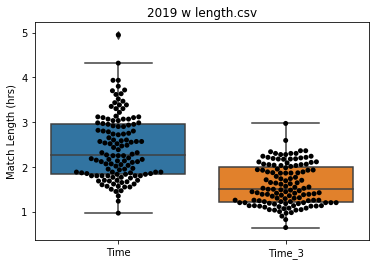

               hr         min        sets       sets3        Time      Time_3
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000
mean     1.880952   32.960317    3.642857    2.404762    2.430291    1.600128
std      0.796062   17.920000    0.753279    0.492805    0.719322    0.452548
min      0.000000    1.000000    3.000000    2.000000    0.966667    0.644444
25%      1.000000   17.250000    3.000000    2.000000    1.837500    1.205556
50%      2.000000   35.500000    3.000000    2.000000    2.275000    1.500000
75%      2.000000   48.000000    4.000000    3.000000    2.950000    2.002500
max      4.000000   59.000000    5.000000    3.000000    4.950000    2.970000


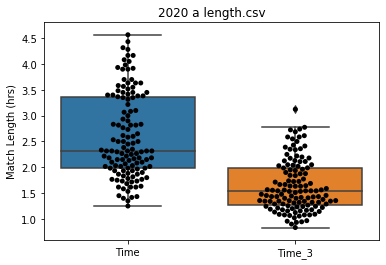

              hr        min       sets      sets3        Time      Time_3
count  125.00000  125.00000  125.00000  125.00000  125.000000  125.000000
mean     2.11200   29.51200    3.71200    2.33600    2.603867    1.635651
std      0.88186   17.20072    0.82125    0.47424    0.821669    0.493573
min      1.00000    0.00000    3.00000    2.00000    1.250000    0.833333
25%      1.00000   16.00000    3.00000    2.00000    1.983333    1.266667
50%      2.00000   27.00000    3.00000    2.00000    2.316667    1.533333
75%      3.00000   44.00000    4.00000    3.00000    3.366667    1.987500
max      4.00000   59.00000    5.00000    3.00000    4.566667    3.125000


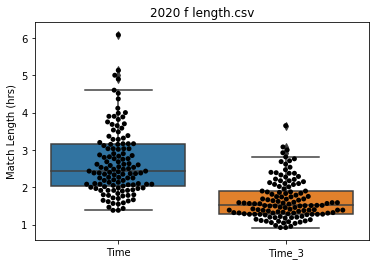

               hr         min        sets       sets3        Time      Time_3
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000
mean     2.176000   28.672000    3.600000    2.264000    2.653867    1.666620
std      0.950925   18.155589    0.762001    0.442573    0.872623    0.520873
min      1.000000    0.000000    3.000000    2.000000    1.383333    0.922222
25%      2.000000   11.000000    3.000000    2.000000    2.033333    1.291667
50%      2.000000   29.000000    3.000000    2.000000    2.433333    1.516667
75%      3.000000   45.000000    4.000000    3.000000    3.150000    1.900000
max      6.000000   59.000000    5.000000    3.000000    6.083333    3.650000


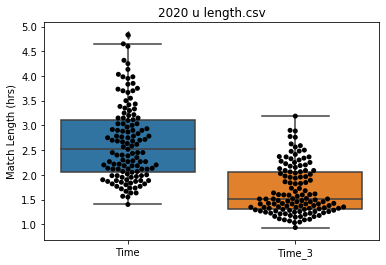

               hr       min       sets       sets3        Time      Time_3
count  125.000000  125.0000  125.00000  125.000000  125.000000  125.000000
mean     2.120000   31.7440    3.72000    2.360000    2.649067    1.683653
std      0.828913   18.6897    0.77875    0.481932    0.760728    0.492633
min      1.000000    0.0000    3.00000    2.000000    1.400000    0.933333
25%      2.000000   13.0000    3.00000    2.000000    2.050000    1.300000
50%      2.000000   35.0000    4.00000    2.000000    2.516667    1.511111
75%      3.000000   49.0000    4.00000    3.000000    3.116667    2.060000
max      4.000000   59.0000    5.00000    3.000000    4.833333    3.187500


In [5]:
##### Import all 4 slam match length files, plot each slams length distribution, make a dataframe with all slam match lengths together.
# Get all the file names:
directory="Slam_Match_Length\\"

slam_names_length=[filename for filename in os.listdir(directory)] #Gets all files in a directory.
#####
df_all=pd.DataFrame()
for slam_name in slam_names_length:
    df=pd.read_csv(directory+slam_name)

    # Get rid of any rows that have zeros
    df = df[(df.T != 0).any()]
    #Get rid of any rows where the number of sets is less than 3.
    df=df[df['sets']>2]

    #Make time column in decimals:
    df['Time']=df['hr']+df['min']/60
    df['Time_3']=df['Time']/df['sets']*df['sets3']

    #Plot 5-set and 3-set match lengths as a box plot with a swarm plot
    sns.boxplot(data=df[['Time','Time_3']])
    sns.swarmplot(data=df[['Time','Time_3']],color='black')
    plt.title(slam_name)
    plt.ylabel('Match Length (hrs)')
    plt.show()

    print(df.describe())
    df_all=pd.concat([df_all,df])

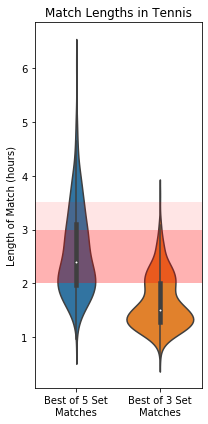

In [6]:
##### Plot distribution of all slam match lengths in a violin plot
plt.figure(figsize=(3,6))
sns.violinplot(data=df_all[['Time','Time_3']])
plt.axhspan(2, 3, color='red', alpha=0.3,lw=0)
plt.axhspan(3, 3+OT_avg_hrs, color='red', alpha=0.1,lw=0)

#Labels:
plt.title('Match Lengths in Tennis')
plt.ylabel('Length of Match (hours)')
plt.xticks(ticks=np.arange(2),labels=['Best of 5 Set\nMatches','Best of 3 Set\nMatches'])
plt.tight_layout()
# plt.savefig('Figures/Figure 5b Tennis Matches lengths.svg')
# plt.savefig('Figures/Figure 5b Tennis Matches lengths.png',dpi=1000)
plt.show()

In [7]:
##### Look at certain properties such as quantiles and means of data

df_all.mean() #average number of sets and length of match

hr         2.071856
min       30.726547
sets       3.668663
sets3      2.341317
Time       2.583965
Time_3     1.646420
dtype: float64

In [8]:
df_all.quantile(.863) #

hr         3.000000
min       53.000000
sets       5.000000
sets3      3.000000
Time       3.516667
Time_3     2.222500
Name: 0.863, dtype: float64

In [9]:
df_all.quantile(.87)

hr         3.00
min       53.00
sets       5.00
sets3      3.00
Time       3.55
Time_3     2.25
Name: 0.87, dtype: float64

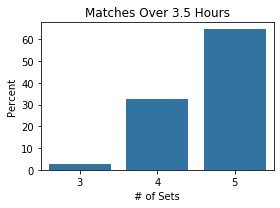

In [10]:
##### Distribution of number of sets for matches over 3.5 hours:
fig=plt.figure(figsize=(4,3))
df_all_3=df_all[df_all['Time']>3]
sns.barplot(x='sets',y='sets',data=df_all_3,estimator=lambda x: len(x)/len(df_all_3)*100,color='#1f77b4')
plt.ylabel('Percent')
plt.xlabel('# of Sets')
plt.title('Matches Over 3.5 Hours')
plt.tight_layout()
# plt.savefig('Figures/Figure 6 Distribution of matches over 3.5 hours.png',dpi=1000)

In [11]:
##### Data from above graph:
df_all_35=df_all[df_all['Time']>3]
df_all_35['sets'].value_counts()#/(91+46+4)

5    91
4    46
3     4
Name: sets, dtype: int64

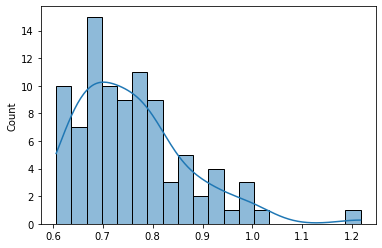

In [12]:
##### Find characteristics of 5 set matches:
df_all_5=df_all_35[df_all_35['sets']==5]
sns.histplot(df_all_5['Time']/df_all_5['sets'],kde=True,bins=20) #plot how long sets take in 5-set matches

In [13]:
(df_all_5['Time']/df_all_5['sets']).mean()*60 #average length of a set in a 5 set match

45.470329670329676

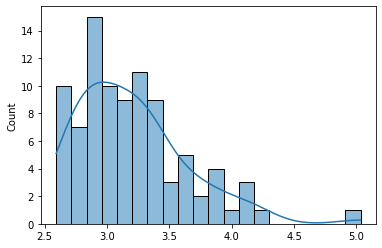

In [14]:
##### How long would a 4 set match with a tiebreak take?
tiebreak_5=df_all_5['Time']/df_all_5['sets']*4+1/6
sns.histplot(tiebreak_5,bins=20,kde=True) #plot how matches would take with tiebreak and 4 sets

In [15]:
tiebreak_5.describe()

count    91.000000
mean      3.198022
std       0.444921
min       2.593333
25%       2.873333
50%       3.126667
75%       3.380000
max       5.033333
dtype: float64

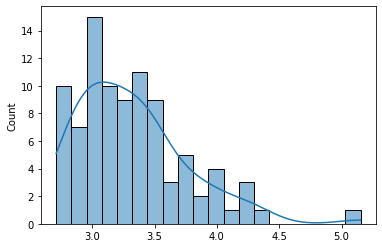

In [16]:
##### How long would a 4 set match with a super tiebreak take?
supert=54*19/60 #Estimation of length of a super tiebreak
super_5=df_all_5['Time']/df_all_5['sets']*4+supert/60
sns.histplot(super_5,bins=20,kde=True) #plot how matches would take with tiebreak and 4 sets

In [17]:
super_5.describe()

count    91.000000
mean      3.316355
std       0.444921
min       2.711667
25%       2.991667
50%       3.245000
75%       3.498333
max       5.151667
dtype: float64